In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
history = []

In [3]:
h1 = {
  'epoch': [0, 1, 2],
  'loss': [0.0275, 0.0230, 0.0099],
  'acc': [0.7238, 0.8246, 0.9310],
  'val_loss': [0.0150, 0.0159, 0.0160],
  'val_acc': [0.6026, 0.7373, 0.8390]
}

In [4]:
h2 = {
  'epoch': [0, 1, 2],
  'loss': [0.0385, 0.0140, 0.0109],
  'acc': [0.7258, 0.8256, 0.9420],
  'val_loss': [0.0160, 0.0169, 0.0170],
  'val_acc': [0.6136, 0.7383, 0.8400]
}

In [5]:
h3 = {
  'epoch': [0, 1, 2],
  'loss': [0.0395, 0.0150, 0.0119],
  'acc': [0.7268, 0.8266, 0.9530],
  'val_loss': [0.0170, 0.0179, 0.0180],
  'val_acc': [0.6246, 0.7393, 0.8410]
}

In [6]:
history.append(h1)
history.append(h2)
history.append(h3)
history

[{'acc': [0.7238, 0.8246, 0.931],
  'epoch': [0, 1, 2],
  'loss': [0.0275, 0.023, 0.0099],
  'val_acc': [0.6026, 0.7373, 0.839],
  'val_loss': [0.015, 0.0159, 0.016]},
 {'acc': [0.7258, 0.8256, 0.942],
  'epoch': [0, 1, 2],
  'loss': [0.0385, 0.014, 0.0109],
  'val_acc': [0.6136, 0.7383, 0.84],
  'val_loss': [0.016, 0.0169, 0.017]},
 {'acc': [0.7268, 0.8266, 0.953],
  'epoch': [0, 1, 2],
  'loss': [0.0395, 0.015, 0.0119],
  'val_acc': [0.6246, 0.7393, 0.841],
  'val_loss': [0.017, 0.0179, 0.018]}]

In [7]:
train_scores = np.zeros((len(history),len(history[0]['acc'])))
for fold in range(len(history)):
    train_scores[fold] = history[fold]['acc']
train_scores

array([[ 0.7238,  0.8246,  0.931 ],
       [ 0.7258,  0.8256,  0.942 ],
       [ 0.7268,  0.8266,  0.953 ]])

In [8]:
test_scores = np.zeros((len(history),len(history[0]['val_acc'])))
for fold in range(len(history)):
    test_scores[fold] = history[fold]['val_acc']
test_scores

array([[ 0.6026,  0.7373,  0.839 ],
       [ 0.6136,  0.7383,  0.84  ],
       [ 0.6246,  0.7393,  0.841 ]])

In [9]:
epochs = history[0]['epoch']
epochs

[0, 1, 2]

In [10]:
train_scores_mean = np.mean(train_scores, axis=0)
train_scores_mean

array([ 0.72546667,  0.8256    ,  0.942     ])

In [11]:
train_scores_std = np.std(train_scores, axis=0)
train_scores_std

array([ 0.00124722,  0.0008165 ,  0.00898146])

In [12]:
test_scores_mean = np.mean(test_scores, axis=0)
test_scores_mean

array([ 0.6136,  0.7383,  0.84  ])

In [13]:
test_scores_std = np.std(test_scores, axis=0)
test_scores_std

array([ 0.00898146,  0.0008165 ,  0.0008165 ])

In [14]:
title='Learning Curve'
figsize=(14, 6)
title_fontsize="large"
text_fontsize="medium"
    
fig, ax = plt.subplots(1, 1, figsize=figsize)

ax.set_title(title, fontsize=title_fontsize)
ax.set_xlabel("Epoch", fontsize=text_fontsize)
ax.set_ylabel("Score", fontsize=text_fontsize)

ax.grid()
ax.fill_between(epochs, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.1, color="r")
ax.fill_between(epochs, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.1, color="g")
ax.plot(epochs, train_scores_mean, 'o-', color="r",
        label="Train")
ax.plot(epochs, test_scores_mean, 'o-', color="g",
        label="Test")
ax.tick_params(labelsize=text_fontsize)
ax.legend(loc="best", fontsize=text_fontsize)

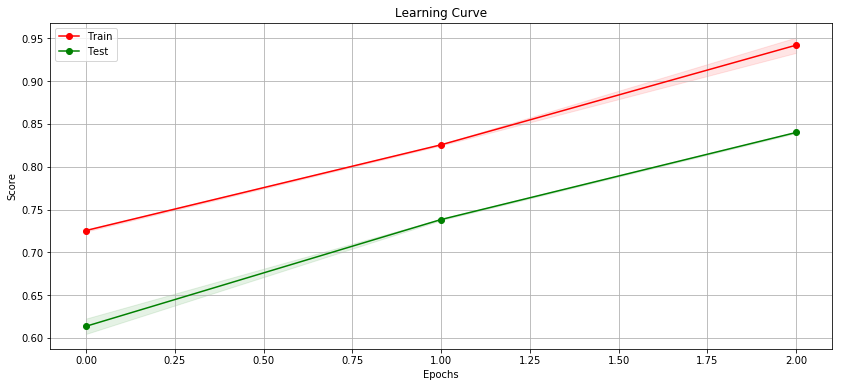

In [15]:
plt.show()

In [21]:
def plot_mean_acc(history):
    train_scores = np.zeros((len(history),len(history[0]['acc'])))
    for fold in range(len(history)):
        train_scores[fold] = history[fold]['acc']
    test_scores = np.zeros((len(history),len(history[0]['val_acc'])))
    for fold in range(len(history)):
        test_scores[fold] = history[fold]['val_acc']
    epochs = history[0]['epoch']
    train_scores_mean = np.mean(train_scores, axis=0)
    train_scores_std = np.std(train_scores, axis=0)
    test_scores_mean = np.mean(test_scores, axis=0)
    test_scores_std = np.std(test_scores, axis=0)
    
    figsize=(14, 6)
    text_fontsize="medium"
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.set_xlabel("Epoch", fontsize=text_fontsize)
    ax.set_ylabel("Score", fontsize=text_fontsize)
    ax.grid()
    ax.fill_between(epochs, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(epochs, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(epochs, train_scores_mean, 'o-', color="r",
            label="Train")
    ax.plot(epochs, test_scores_mean, 'o-', color="g",
            label="Test")
    ax.tick_params(labelsize=text_fontsize)
    ax.legend(loc="best", fontsize=text_fontsize)
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,0.0,1.0))
    plt.show()

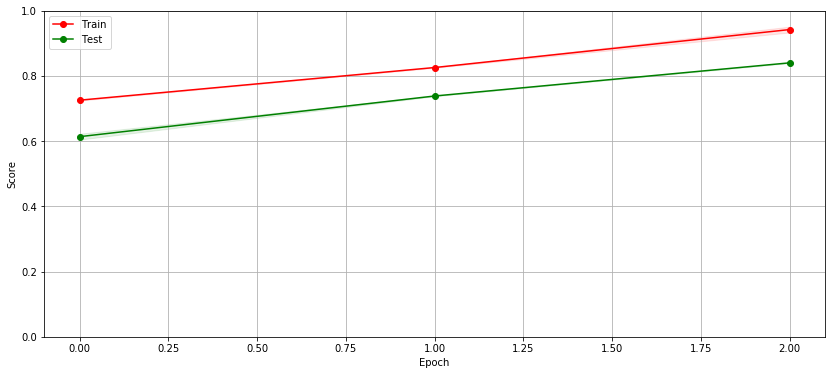

In [22]:
plot_mean_acc(history)

In [25]:
def plot_mean_loss(history):
    train_scores = np.zeros((len(history),len(history[0]['loss'])))
    for fold in range(len(history)):
        train_scores[fold] = history[fold]['loss']
    test_scores = np.zeros((len(history),len(history[0]['val_loss'])))
    for fold in range(len(history)):
        test_scores[fold] = history[fold]['val_loss']
    epochs = history[0]['epoch']
    train_scores_mean = np.mean(train_scores, axis=0)
    train_scores_std = np.std(train_scores, axis=0)
    test_scores_mean = np.mean(test_scores, axis=0)
    test_scores_std = np.std(test_scores, axis=0)
    
    figsize=(14, 6)
    text_fontsize="medium"
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.set_xlabel("Epoch", fontsize=text_fontsize)
    ax.set_ylabel("Loss", fontsize=text_fontsize)
    ax.grid()
    ax.fill_between(epochs, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(epochs, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(epochs, train_scores_mean, 'o-', color="r",
            label="Train")
    ax.plot(epochs, test_scores_mean, 'o-', color="g",
            label="Test")
    ax.tick_params(labelsize=text_fontsize)
    ax.legend(loc="best", fontsize=text_fontsize)
    plt.show()

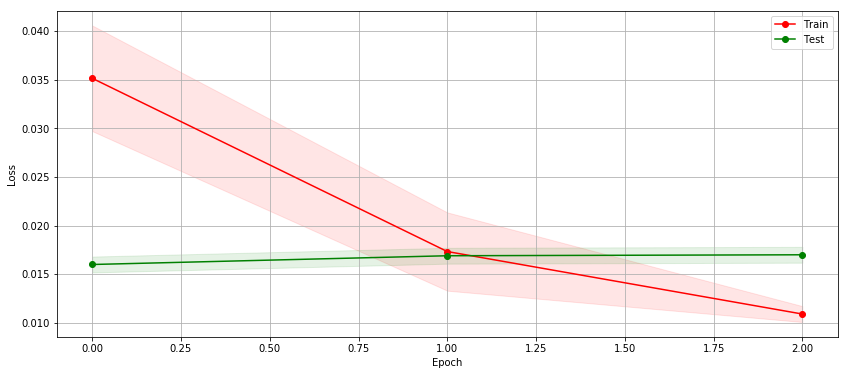

In [26]:
plot_mean_loss(history)